In [1]:
# Install package for Lasso
if(!require("glmnet")){
    install.packages("glmnet")
}

# Install package for HMLasso
if(!require("hmlasso")){
    install.packages("hmlasso")
}

# Install package for Pliable Lasso
if(!require("pliable")){
    url <- "https://cran.r-project.org/src/contrib/Archive/pliable/pliable_1.1.tar.gz"
    pkgFile <- "pliable_1.1.tar.gz"
    download.file(url = url, destfile = pkgFile)
    install.packages(pkgs=pkgFile, type="source", repos=NULL)
    unlink(pkgFile)
}

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 3.0-2


Loading required package: hmlasso

Loading required package: pliable

Loading required package: class



## Lasso vs HMLasso

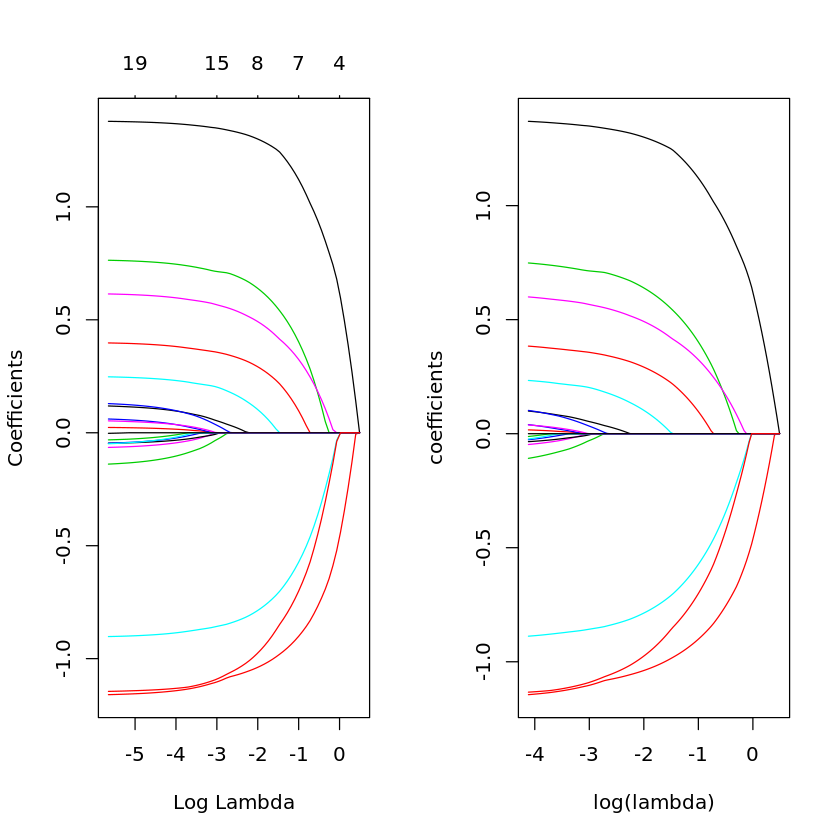

In [2]:
library(glmnet)
library(hmlasso)
data(QuickStartExample)
fit_glmnet <- glmnet(x, y)
fit_hmlasso <- hmlasso(x, y)
par(mfrow=c(1,2))
plot(fit_glmnet, xvar="lambda")
plot(fit_hmlasso)

In [3]:
# Cross Validation for Lasso
cv.fit_glmnet <- cv.glmnet(x, y)
fit_glmnet <- glmnet(x, y, lambda=cv.fit_glmnet$lambda.min)

# Cross Validation for HMLasso
cv.fit_hmlasso <- cv.hmlasso(x, y)
fit_hmlasso <- hmlasso(x, y, lambda=cv.fit_hmlasso$lambda.min)

In [4]:
# Lasso
print(coef(fit_glmnet))
# 21 x 1 sparse Matrix of class "dgCMatrix"
#                      s0
# (Intercept)  0.14867809
# V1           1.33376362
# V2           .         
# V3           0.69787555
# V4           .         
# V5          -0.83726103
# V6           0.54334630
# V7           0.02668587
# V8           0.33740506
# V9           .         
# V10          .         
# V11          0.17105939
# V12          .         
# V13          .         
# V14         -1.07553017
# V15          .         
# V16          .         
# V17          .         
# V18          .         
# V19          .         
# V20         -1.05279163

21 x 1 sparse Matrix of class "dgCMatrix"
                     s0
(Intercept)  0.14867809
V1           1.33376362
V2           .         
V3           0.69787555
V4           .         
V5          -0.83726103
V6           0.54334630
V7           0.02668587
V8           0.33740506
V9           .         
V10          .         
V11          0.17105939
V12          .         
V13          .         
V14         -1.07553017
V15          .         
V16          .         
V17          .         
V18          .         
V19          .         
V20         -1.05279163


In [5]:
# HMLasso
print(fit_hmlasso$beta)
#              [,1]
#  [1,]  1.33373739
#  [2,]  0.00000000
#  [3,]  0.69787887
#  [4,]  0.00000000
#  [5,] -0.83726072
#  [6,]  0.54334981
#  [7,]  0.02668771
#  [8,]  0.33739320
#  [9,]  0.00000000
# [10,]  0.00000000
# [11,]  0.17107586
# [12,]  0.00000000
# [13,]  0.00000000
# [14,] -1.07553420
# [15,]  0.00000000
# [16,]  0.00000000
# [17,]  0.00000000
# [18,]  0.00000000
# [19,]  0.00000000
# [20,] -1.05280162

             [,1]
 [1,]  1.33373739
 [2,]  0.00000000
 [3,]  0.69787887
 [4,]  0.00000000
 [5,] -0.83726072
 [6,]  0.54334981
 [7,]  0.02668771
 [8,]  0.33739320
 [9,]  0.00000000
[10,]  0.00000000
[11,]  0.17107586
[12,]  0.00000000
[13,]  0.00000000
[14,] -1.07553420
[15,]  0.00000000
[16,]  0.00000000
[17,]  0.00000000
[18,]  0.00000000
[19,]  0.00000000
[20,] -1.05280162


In [6]:
library(glmnet)
data(QuickStartExample)
x.miss <- x
len <- length(x)
misses <- sample(1:len, len%/%2) 
x.miss[misses] <- NA

In [7]:
fit_glmnet <- glmnet(x.miss, y)
# Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)
# Traceback:
# 
# 1. glmnet(x.miss, y)
# 2. elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, 
#  .     alpha, nobs, nvars, jd, vp, cl, ne, nx, nlam, flmin, ulam, 
#  .     thresh, isd, intr, vnames, maxit)

ERROR: Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)


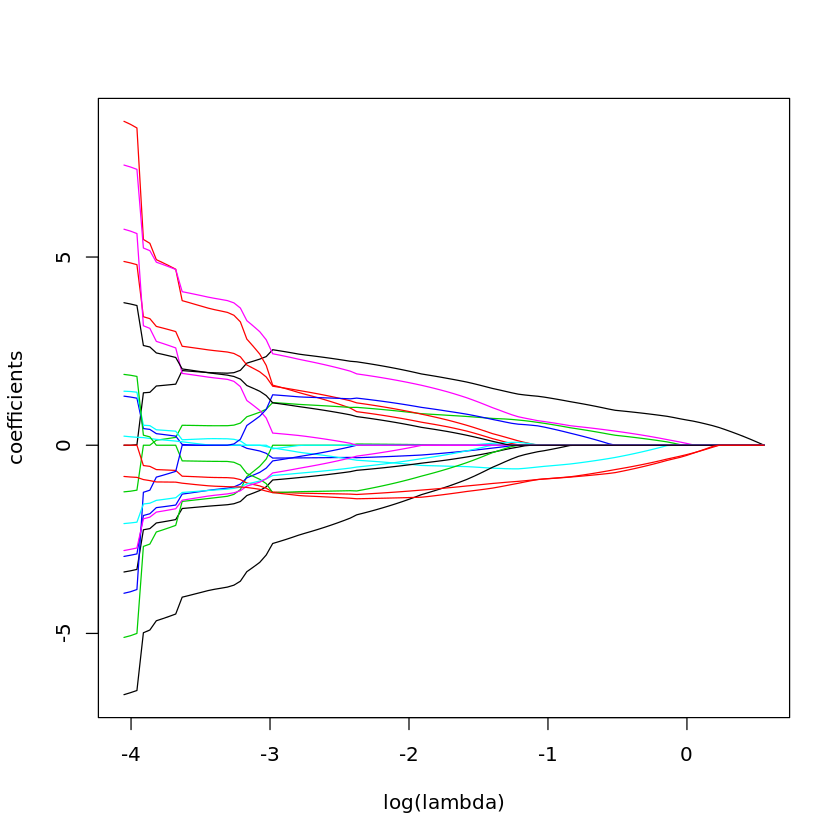

In [8]:
fit_hmlasso <- hmlasso(x.miss, y) 
plot(fit_hmlasso)

In [9]:
# Cross Validation for HMLasso
cv.fit_hmlasso <-cv.hmlasso(x.miss, y)
fit_hmlasso <- hmlasso(x.miss, y, lambda=cv.fit_hmlasso$lambda.min)
print(fit_hmlasso$beta)
#             [,1]
# [1,]  1.30137227
# [2,]  0.00000000
# [3,]  0.60682922
# [4,]  0.00000000
# [5,] -0.57899508
# [6,]  0.65230778
# [7,]  0.00000000
# [8,]  0.00000000
# [9,]  0.00000000
#[10,]  0.00000000
#[11,]  0.01089438
#[12,]  0.00000000
#[13,] -0.17263369
#[14,] -0.91035339
#[15,]  0.00000000
#[16,]  0.51472445
#[17,]  0.00000000
#[18,]  0.00000000
#[19,]  0.00000000
#[20,] -0.91232818

             [,1]
 [1,]  1.30137227
 [2,]  0.00000000
 [3,]  0.60682922
 [4,]  0.00000000
 [5,] -0.57899508
 [6,]  0.65230778
 [7,]  0.00000000
 [8,]  0.00000000
 [9,]  0.00000000
[10,]  0.00000000
[11,]  0.01089438
[12,]  0.00000000
[13,] -0.17263369
[14,] -0.91035339
[15,]  0.00000000
[16,]  0.51472445
[17,]  0.00000000
[18,]  0.00000000
[19,]  0.00000000
[20,] -0.91232818


## Lasso vs Pliable Lasso

In [12]:
library(pliable)
n <- 50; p <- 10; nz <- 5
x <- scale(matrix(rnorm(n*p), n, p))
z <- scale(matrix(rnorm(n*nz), n, nz))
y <- 2 * x[,1] - x[,3] + 3 * x[,3] * z[,4] + 0.05 * rnorm(n)
xz <- matrix(0, n, p*nz)
for (i in 1:p) {
    for (j in 1:nz) {
        xz[,p*(i-1)+j] <- x[,i] * z[,j]
    }
}
new_x <- cbind(x, z, xz)
fit_glmnet <- glmnet(new_x, y)
fit_pliable <- pliable(x, z, y)
par(mfrow=c(1,2))
plot(fit_glmnet, xvar="lambda")
plot(fit_pliable, xvar="lambda")

ERROR: Error in `[<-`(`*tmp*`, , p * (i - 1) + j, value = x[, i] * z[, j]): subscript out of bounds


In [45]:
cv.fit_pliable <- cv.pliable(fit_pliable, x, z, y, verbose=FALSE)
fit_pliable <- pliable(x, z, y, lambda=cv.fit_pliable$lambda.min)
print(coef(fit_pliable))
# $betaz
# [1]  0.009173857  0.004249935 -0.001150623  0.038598553 -0.012416613
# 
# $beta
#  [1]  2.0189757985  0.0008748058 -0.9902472427  0.0036971722 -0.0004814565
#  [6] -0.0026484450  0.0004894357 -0.0078204623  0.0104170488  0.0193589680
# 
# $theta
#                [,1]          [,2]          [,3]         [,4]         [,5]
#  [1,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.016887997
#  [2,]  0.0000000000  0.0000000000 -0.0001943691  0.004131890  0.004469231
#  [3,]  0.0000000000 -0.0094655482  0.0147303831  2.953906364 -0.000871455
#  [4,] -0.0007782297  0.0006704536  0.0000000000  0.004222852  0.000000000
#  [5,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.000000000
#  [6,] -0.0034616675  0.0000000000  0.0001779493  0.000000000  0.000000000
#  [7,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.000000000
#  [8,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.000000000
#  [9,]  0.0049003323 -0.0008187326  0.0076394353  0.000000000 -0.005070730
# [10,]  0.0000000000  0.0124991293  0.0000000000 -0.003296149  0.000000000

$betaz
[1]  0.009173857  0.004249935 -0.001150623  0.038598553 -0.012416613

$beta
 [1]  2.0189757985  0.0008748058 -0.9902472427  0.0036971722 -0.0004814565
 [6] -0.0026484450  0.0004894357 -0.0078204623  0.0104170488  0.0193589680

$theta
               [,1]          [,2]          [,3]         [,4]         [,5]
 [1,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.016887997
 [2,]  0.0000000000  0.0000000000 -0.0001943691  0.004131890  0.004469231
 [3,]  0.0000000000 -0.0094655482  0.0147303831  2.953906364 -0.000871455
 [4,] -0.0007782297  0.0006704536  0.0000000000  0.004222852  0.000000000
 [5,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.000000000
 [6,] -0.0034616675  0.0000000000  0.0001779493  0.000000000  0.000000000
 [7,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.000000000
 [8,]  0.0000000000  0.0000000000  0.0000000000  0.000000000  0.000000000
 [9,]  0.0049003323 -0.0008187326  0.0076394353  0.000000000 -0.005070730
[10,]  0.0000000000

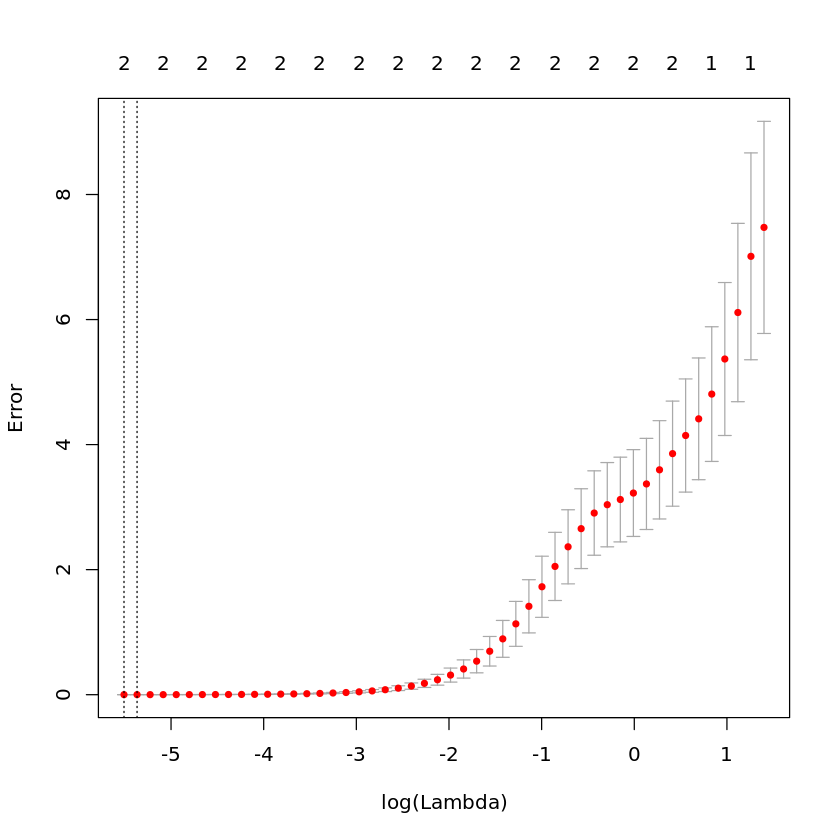

In [35]:
plot(cv.fit_pliable)

In [47]:
cbind(x, z)

[,1]         [,2]        [,3]        [,4]        [,5]        [,6]        
 [1,] -1.676335592  0.22906319 -0.80805497  0.42371377  2.32786108 -1.679897828
 [2,]  0.238273544  0.05469818  0.32498681  0.48470973 -2.03691958 -0.001011331
 [3,] -1.258406870 -0.44346133 -0.13922846 -0.84110076  0.04142859 -1.064411930
 [4,]  0.045339845  0.97632866 -0.80602894 -0.15337215 -0.35429604  1.428386372
 [5,] -0.124410034  0.84540425 -0.25792265 -0.54992400  0.48464521 -0.879046872
 [6,] -0.883467636 -1.04645177  0.77521513 -0.51093371 -0.44072195  0.975775088
 [7,]  0.660128774  0.40551366  2.15884173 -0.50313557 -1.10759927  0.426520247
 [8,]  0.040544160 -0.24007612  0.14526073 -0.45232390 -0.69124128  0.242914826
 [9,]  0.378451378 -0.05180719  0.17931306 -0.85830149  0.01567376  1.594487590
[10,]  1.054320124  1.00445101  0.22608098 -0.73306054  0.97052016  1.126207416
[11,] -1.198878386 -1.23819585  1.93527493 -0.49088474 -0.36558473 -1.077571568
[12,] -0.252957802  0.22131352 -0.58728647 -1.65351488  0.94586927 -1.104696668
[13,]  2.066403384  0.60076060  0.51197546  1.29786771 -1.84195957 -0.948964538
[14,]  1.773616852 -2.31114739  0.19750192  0.83302254 -1.79319680  0.981406280
[15,]  0.104089107 -1.12975043  1.18999359  0.44311655  0.48950815 -0.312594202
[16,] -1.055897783 -0.17573630  0.83361448 -0.25006702 -1.19564412  0.560559508
[17,] -0.234789733  1.34347229 -1.34650678 -2.20395236  0.13970446 -0.452985388
[18,] -0.110505778 -1.68059407 -0.68323604 -0.09741569  0.36449406 -1.196043881
[19,]  0.931087801  1.21444365  1.97458382  2.24648662 -1.50432238 -0.599001385
[20,] -0.729972433  0.14070162  0.95974849 -0.05830419 -0.05499169 -0.828747101
[21,] -0.520621493  0.72810912  0.11961350 -0.02034457 -0.21741872  0.576002920
[22,] -0.271230058  2.52657214  0.07079192  1.19424961  0.98348771  0.122960383
[23,]  0.610204705 -1.48523560  0.08003921  0.67107157  1.51361150  1.949833083
[24,] -0.207817354  0.78876471 -1.81146660 -0.88490374 -1.92957080  0.641524882
[25,]  0.177625509 -0.19553199  1.96263244 -0.20963455 -0.02298269 -0.633858728
[26,]  0.299768047 -0.79733153 -0.30747265  0.51441826 -0.59472240  0.807412244
[27,]  1.788784047  1.90541714  0.99942944 -0.14818080  0.88200963  0.005852548
[28,]  0.349625400 -0.76401142 -0.01429492  0.63963122  0.36489077  0.066046419
[29,]  0.996308110  0.52481951 -1.31619858 -0.96517086 -0.86379978  1.198269106
[30,] -0.714542428  0.95695707  0.16971053 -0.11595351 -0.34172805 -0.377706814
[31,] -0.961669435  0.95448092 -0.58287232  1.18413085  1.01880522 -2.079390350
[32,] -0.012216196 -1.03367755 -0.65578045 -1.68874368  0.41405447  2.846373760
[33,]  0.236211100  0.47237962 -0.07361976  0.83803677  0.99866631 -0.072870842
[34,] -1.341133485 -0.49067798 -0.43468156  0.14976067  0.05667463  0.034941776
[35,] -1.182681850  0.85643105  1.32302389  1.55355152  0.79937952  0.735208640
[36,] -1.227132759 -0.29182954  0.65441379  1.67512481  0.16429541 -0.923429596
[37,]  1.220200134 -0.12863831 -0.85787678  1.39113199  1.05713516  0.807040878
[38,] -2.186316569 -0.42173181 -0.13504069  1.61203764  0.86657046 -1.094959617
[39,] -1.087413622  1.45007180 -1.94078568 -0.71427331 -0.05966684 -0.913728966
[40,]  0.533648440 -1.75416750  0.03582119  1.21142567  0.84021892  0.057194370
[41,]  2.409543013  0.16272218 -0.73805634 -0.12752380  0.28602016  0.913415942
[42,] -0.351757866 -0.46217874 -1.37869069  0.98146067  0.84843185  0.753877749
[43,]  1.645372565 -0.14638002  1.20564326 -0.02618882 -1.21118161  0.214590724
[44,] -0.032533509 -0.22277855 -0.25740141 -0.82230147  0.79510550 -0.407498473
[45,]  0.001779142 -0.35057676 -2.01360629 -0.89406299  1.45256360 -0.668079945
[46,]  0.453585582 -1.19223683  0.17199401 -1.91292833 -0.18637816 -1.175534584
[47,] -0.364641782 -1.73333947 -0.37956136 -0.30663310 -1.52585296 -0.210045193
[48,]  0.821488197  0.52148146 -0.76092201  0.55794261  0.79997569 -1.339059560
[49,] -1.264339653  0.31329979  1.06106856 -0.15015592 -1.35168581  0.026723848
[50,] 